<a href="https://www.kaggle.com/code/linijoseph/covid-xray-cnn?scriptVersionId=119731976" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "linijoseph"
os.environ['KAGGLE_KEY']= "da0b95f926372b324b812fa2fa5630d9"

In [2]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 99%|███████████████████████████████████████▊| 774M/778M [00:19<00:00, 40.4MB/s]
100%|████████████████████████████████████████| 778M/778M [00:19<00:00, 42.2MB/s]


In [3]:
!unzip covid19-radiography-database.zip

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Archive:  covid19-radiography-database.zip
  inflating: COVID-19_Radiography_Dataset/COVID.metadata.xlsx  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-10.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-100.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1000.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1001.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1002.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1003.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1004.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1005.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1006.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1007.png  
  inflati

In [4]:
len(os.listdir("COVID-19_Radiography_Dataset/COVID"))


2

In [5]:
len(os.listdir("COVID-19_Radiography_Dataset/COVID/images"))

3616

In [6]:
len(os.listdir("COVID-19_Radiography_Dataset/Normal/images"))

10192

In [7]:
import cv2

In [8]:
img = cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-1000.png')

In [9]:
import matplotlib.pyplot as plt


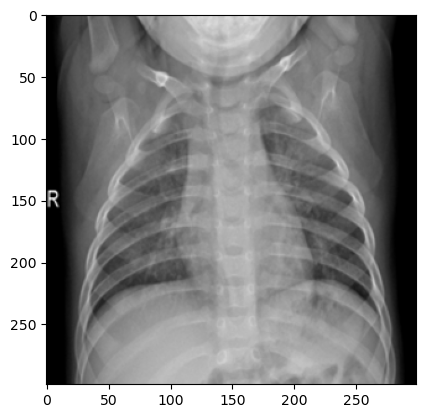

In [10]:
plt.imshow(img)

In [11]:
img.shape

(299, 299, 3)

In [12]:
import pandas as pd


In [13]:
df = pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

In [14]:
df.head()


,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [15]:
urls = os.listdir('COVID-19_Radiography_Dataset/COVID/images')

In [16]:
path = "COVID-19_Radiography_Dataset/COVID/images/" + urls[0]

In [17]:

path

'COVID-19_Radiography_Dataset/COVID/images/COVID-2491.png'

In [18]:
import numpy as np

In [19]:
def loadImages(path, urls,target ):
  images = []
  labels = []
  #for i in range(len(urls))
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels


In [20]:
covid_path = "COVID-19_Radiography_Dataset/COVID/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [21]:
len(covidUrl), len(covidImages)

(3616, 3616)

In [22]:
normal_path = "COVID-19_Radiography_Dataset/Normal/images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [23]:
covidImages=np.asarray(covidImages)

In [24]:
len(normalImages), len(normal_urls)

(10192, 10192)

In [25]:
normalImages=np.asarray(normalImages)

In [26]:
covidImages.shape

(3616, 100, 100, 3)

In [27]:
normalImages.shape

(10192, 100, 100, 3)

In [28]:
data = np.r_[covidImages, normalImages]

In [29]:
data.shape


(13808, 100, 100, 3)

In [30]:
targets = np.r_[covidTargets, normalTargets]

In [31]:
targets.shape

(13808,)

In [32]:
#data = data / 255.0

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [35]:
import tensorflow as tf

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [37]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    #Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

2023-02-20 10:40:19.725083: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.7/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-02-20 10:40:19.725161: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0

In [39]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [40]:
model.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

2023-02-20 10:40:21.727104: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1242720000 exceeds 10% of free system memory.


Epoch 1/5
324/324 [==============================] - 81s 246ms/step - loss: 0.4146 - accuracy: 0.8028 - val_loss: 0.3313 - val_accuracy: 0.8636
Epoch 2/5
324/324 [==============================] - 81s 249ms/step - loss: 0.2940 - accuracy: 0.8722 - val_loss: 0.2756 - val_accuracy: 0.8844
Epoch 3/5
324/324 [==============================] - 79s 245ms/step - loss: 0.2488 - accuracy: 0.8926 - val_loss: 0.2437 - val_accuracy: 0.9009
Epoch 4/5
324/324 [==============================] - 79s 244ms/step - loss: 0.2092 - accuracy: 0.9163 - val_loss: 0.2361 - val_accuracy: 0.9001
Epoch 5/5
324/324 [==============================] - 79s 245ms/step - loss: 0.1793 - accuracy: 0.9299 - val_loss: 0.2188 - val_accuracy: 0.9160


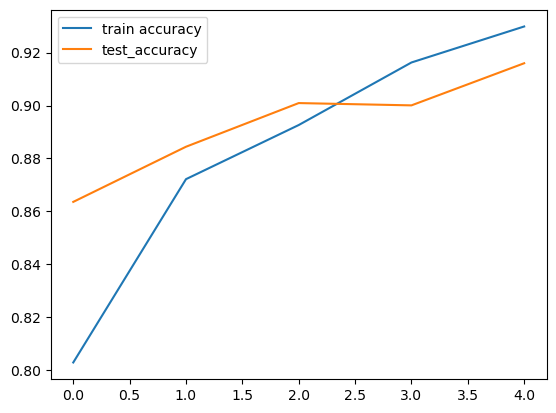

In [41]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

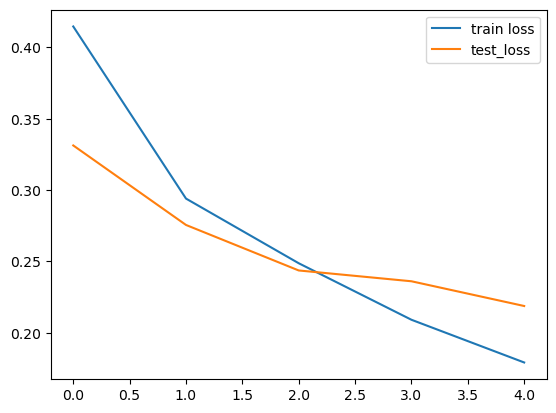

In [42]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()